# Plot trajectory and quantify tracking error

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import seaborn as sns
import os
import pandas as pd
from offroad.utils import load_state
import json
import ipywidgets as widgets
from ipywidgets import interact
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [289]:
error_dict = {
    'straight': {'mppi': None, 'pid': None},
    'circle': {'mppi': None, 'pid': None},
    'counter circle': {'mppi': None, 'pid': None},
    'oval': {'mppi': None, 'pid': None},
    'counter oval': {'mppi': None, 'pid': None},
}

# 2024/1/13 Data (dt=0.06)

## Straight Line

In [290]:
log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-211613'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [0, 17], orientation_provider="ORIENTATION_PROVIDOER")
obs_mppi_straight_1 = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-211256'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [0, 16], orientation_provider="ORIENTATION_PROVIDOER")
obs_mppi_straight_2 = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-211613'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [0, 17], orientation_provider="ORIENTATION_PROVIDOER")
obs_mppi_straight_3 = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-211821'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [0, 16], orientation_provider="ORIENTATION_PROVIDOER")
obs_pid_straight_1 = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-212006'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [0, 16], orientation_provider="ORIENTATION_PROVIDOER")
obs_pid_straight_2 = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-212055'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [0, 16], orientation_provider="ORIENTATION_PROVIDOER")
obs_pid_straight_3 = p_dict['obs']

obs_np = obs_pid_straight_3 + 0.

def straight_distance(x, y):
    A, B, C = -1.37, 1, -0.76
    distance = np.abs(A * x + B * y + C) / np.sqrt(A**2 + B**2)
    return distance

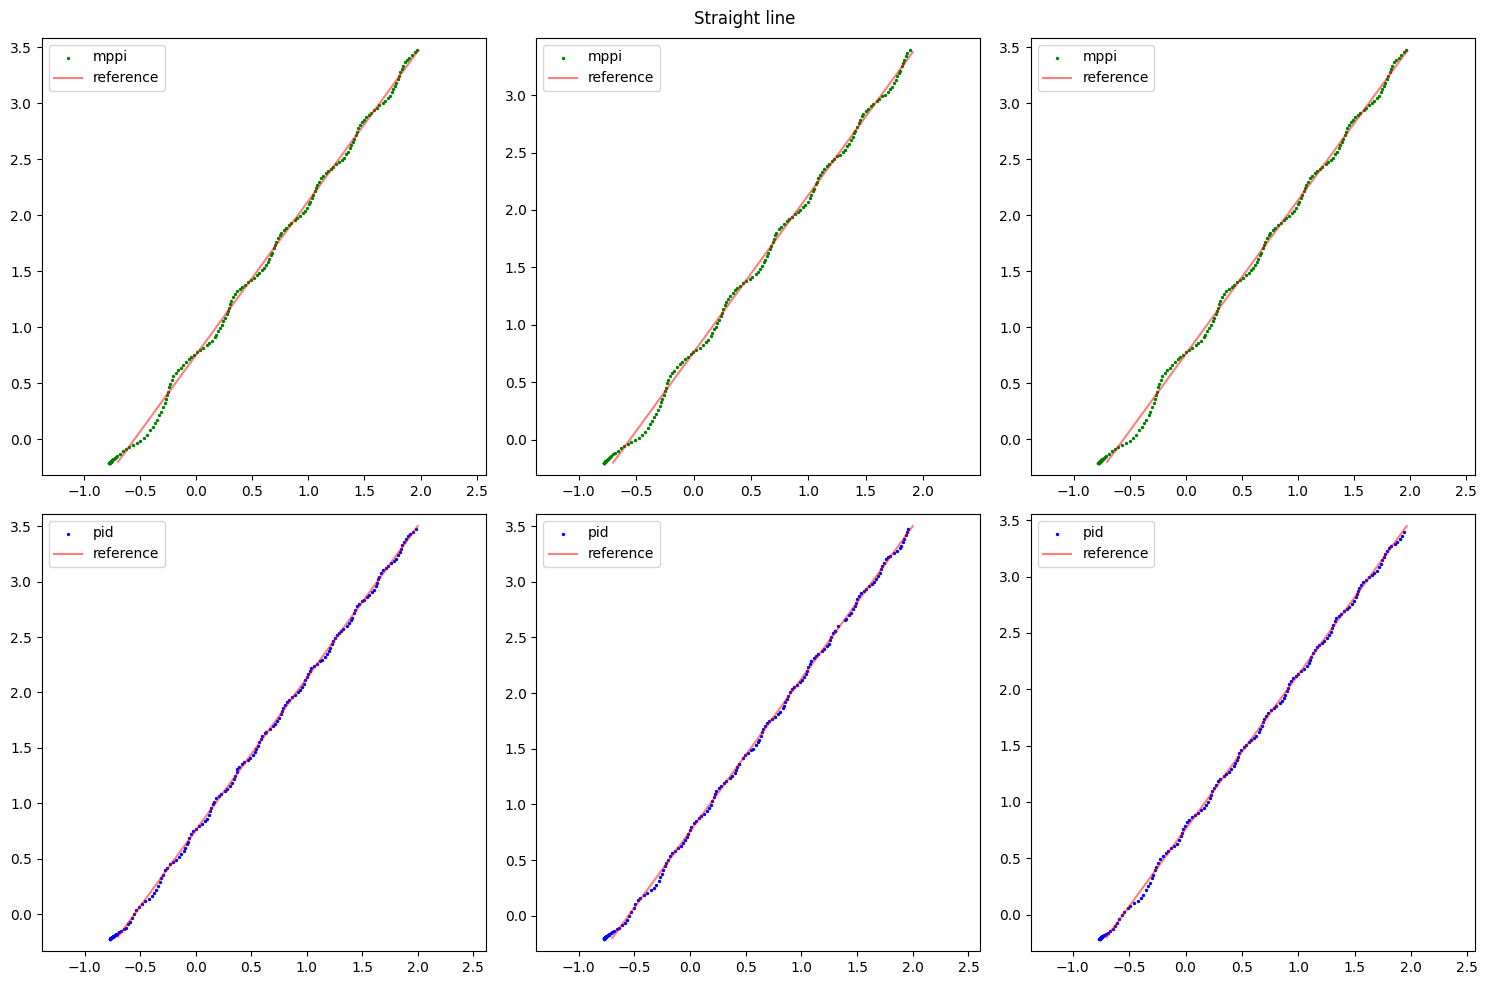

In [291]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
axs[0,0].scatter(obs_mppi_straight_1[:,0],obs_mppi_straight_1[:,1],s=2, color='green',label='mppi')
axs[0,1].scatter(obs_mppi_straight_2[:,0],obs_mppi_straight_2[:,1],s=2,color='green',label='mppi')
axs[0,2].scatter(obs_mppi_straight_3[:,0],obs_mppi_straight_3[:,1],s=2,color='green',label='mppi')
axs[1,0].scatter(obs_pid_straight_1[:,0],obs_pid_straight_1[:,1],s=2,color='blue',label='pid')
axs[1,1].scatter(obs_pid_straight_2[:,0],obs_pid_straight_2[:,1],s=2,color='blue',label='pid')
axs[1,2].scatter(obs_pid_straight_3[:,0],obs_pid_straight_3[:,1],s=2,color='blue',label='pid')
axs[0,0].plot(obs_mppi_straight_1[:,5],obs_mppi_straight_1[:,6], color='red',label='reference',alpha=0.5)
axs[0,1].plot(obs_mppi_straight_2[:,5],obs_mppi_straight_2[:,6], color='red',label='reference',alpha=0.5)
axs[0,2].plot(obs_mppi_straight_3[:,5],obs_mppi_straight_3[:,6], color='red',label='reference',alpha=0.5)
axs[1,0].plot(obs_pid_straight_1[:,5],obs_pid_straight_1[:,6], color='red',label='reference',alpha=0.5)
axs[1,1].plot(obs_pid_straight_2[:,5],obs_pid_straight_2[:,6], color='red',label='reference',alpha=0.5)
axs[1,2].plot(obs_pid_straight_3[:,5],obs_pid_straight_3[:,6], color='red',label='reference',alpha=0.5)

for i in range(2):
    for j in range(3):
        axs[i,j].axis("equal")
        axs[i,j].legend()
plt.suptitle("Straight line")
plt.tight_layout()
# plt.plot(obs_np[:,0],obs_np[:,1])
# plt.plot(obs_np[:,5],obs_np[:,6])

# plt.plot(distance(obs_np[:,0],obs_np[:,1]))
error_dict['straight']['mppi'] = distance(obs_mppi_straight_1[:,0],obs_mppi_straight_1[:,1]).tolist() +\
                                                distance(obs_mppi_straight_2[:,0],obs_mppi_straight_2[:,1]).tolist() +\
                                                distance(obs_mppi_straight_3[:,0],obs_mppi_straight_3[:,1]).tolist()

error_dict['straight']['pid'] = distance(obs_pid_straight_1[:,0],obs_pid_straight_1[:,1]).tolist() +\
                                                distance(obs_pid_straight_2[:,0],obs_pid_straight_2[:,1]).tolist() +\
                                                distance(obs_pid_straight_3[:,0],obs_pid_straight_3[:,1]).tolist()

## Circle

In [292]:
log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-204955'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [30, 300], orientation_provider="ORIENTATION_PROVIDOER")
obs_mppi_circle = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-205528'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [46, 274], orientation_provider="ORIENTATION_PROVIDOER")
obs_mppi_counter_circle = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-213741'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [80, 164], orientation_provider="ORIENTATION_PROVIDOER")
obs_pid_circle = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-212207'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [107, 264], orientation_provider="ORIENTATION_PROVIDOER")
obs_pid_counter_circle = p_dict['obs']

def distance_circle(x, y):
    dist = np.sqrt((x-1.)**2+(y-1.2)**2) -1.2
    return dist

def distance_counter_circle(x,y):
    dist = np.sqrt((x-.9)**2+(y-1.2)**2) -1.2
    return dist

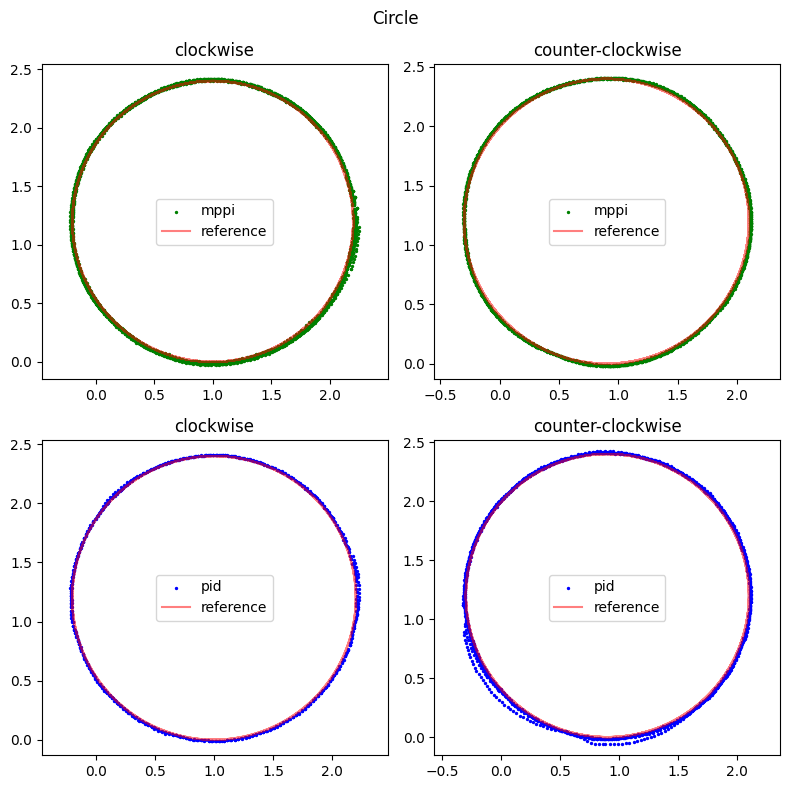

In [293]:
fig, axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].scatter(obs_mppi_circle[:,0],obs_mppi_circle[:,1],s=2,color='green',label='mppi')
axs[0,1].scatter(obs_mppi_counter_circle[:,0],obs_mppi_counter_circle[:,1],s=2,color='green',label='mppi')
axs[1,0].scatter(obs_pid_circle[:,0],obs_pid_circle[:,1],s=2,color='blue',label='pid')
axs[1,1].scatter(obs_pid_counter_circle[:,0],obs_pid_counter_circle[:,1],s=2,color='blue',label='pid')

axs[0,0].plot(obs_mppi_circle[:,5],obs_mppi_circle[:,6], color='red', alpha=0.5,label='reference',)
axs[0,1].plot(obs_mppi_counter_circle[:,5],obs_mppi_counter_circle[:,6], color='red', alpha=0.5,label='reference',)
axs[1,0].plot(obs_pid_circle[:,5],obs_pid_circle[:,6], color='red', alpha=0.5,label='reference',)
axs[1,1].plot(obs_pid_counter_circle[:,5],obs_pid_counter_circle[:,6], color='red', alpha=0.5,label='reference',)

for i in range(2):
    for j in range(2):
        axs[i,j].axis("equal")
        axs[i,j].legend()
        if j == 1:
            axs[i,j].set_title('counter-clockwise')
        if j == 0:    
            axs[i,j].set_title('clockwise')
plt.suptitle("Circle")
plt.tight_layout()

error_dict['circle']['mppi'] = distance_circle(obs_mppi_circle[:,0],obs_mppi_circle[:,1]).tolist()
error_dict['counter circle']['mppi'] = distance_counter_circle(obs_mppi_counter_circle[:,0],obs_mppi_counter_circle[:,1]).tolist()
error_dict['circle']['pid'] = distance_circle(obs_pid_circle[:,0],obs_pid_circle[:,1]).tolist()
error_dict['counter circle']['pid'] = distance_counter_circle(obs_pid_counter_circle[:,0],obs_pid_counter_circle[:,1]).tolist()

## Oval

In [294]:
log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-203647'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [41, 319], orientation_provider="ORIENTATION_PROVIDOER")
obs_mppi_oval = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-202130'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [0, 259], orientation_provider="ORIENTATION_PROVIDOER")
obs_mppi_counter_oval = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-213303'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [32,176], orientation_provider="ORIENTATION_PROVIDOER")
obs_pid_oval = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-213104'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [16,64], orientation_provider="ORIENTATION_PROVIDOER")
obs_pid_counter_oval = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240113-212753'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [11,99], orientation_provider="ORIENTATION_PROVIDOER")
obs_pid_counter_oval2 = p_dict['obs']

import numpy as np

def create_oval(center, x_radius, y_radius, num_points=100000):
    t = np.linspace(0, 2 * np.pi, num_points)
    x_oval = center[0] + x_radius * np.cos(t)
    y_oval = center[1] + y_radius * np.sin(t)
    return np.vstack((x_oval, y_oval)).T
oval_points = create_oval([0.9, 1.0], 1.2,1.4)
counter_oval_points = create_oval([0.8, 1.0], 1.2,1.4)

def distance_oval(x, y):
    errors = []
    for x0, y0 in zip(x, y):
        distances = np.sqrt((oval_points[:, 0] - x0)**2 + (oval_points[:, 1] - y0)**2)
        errors.append(np.min(distances))
    return np.array(errors)

def distance_counter_oval(x, y):
    errors = []
    for x0, y0 in zip(x, y):
        distances = np.sqrt((counter_oval_points[:, 0] - x0)**2 + (counter_oval_points[:, 1] - y0)**2)
        errors.append(np.min(distances))
    return np.array(errors)


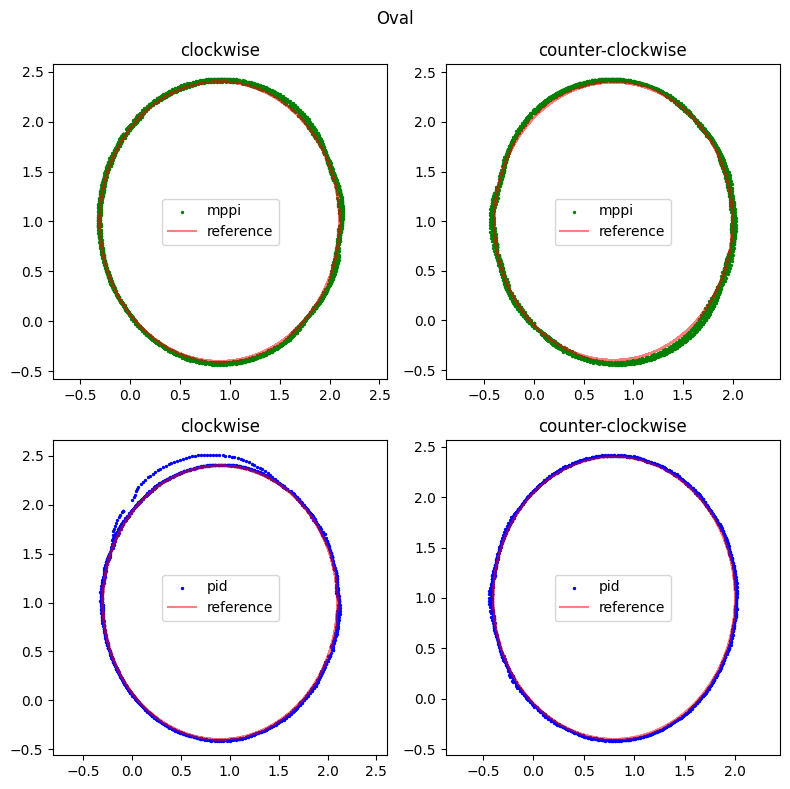

In [295]:
fig, axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].scatter(obs_mppi_oval[:,0],obs_mppi_oval[:,1],s=2,color='green',label='mppi')
axs[0,1].scatter(obs_mppi_counter_oval[:,0],obs_mppi_counter_oval[:,1],s=2,color='green',label='mppi')
axs[1,0].scatter(obs_pid_oval[:,0],obs_pid_oval[:,1],s=2,color='blue',label='pid')
axs[1,1].scatter(obs_pid_counter_oval[:,0],obs_pid_counter_oval[:,1],s=2,color='blue',label='pid')
axs[1,1].scatter(obs_pid_counter_oval2[:,0],obs_pid_counter_oval2[:,1],s=2,color='blue')

axs[0,0].plot(obs_mppi_oval[:,5],obs_mppi_oval[:,6], color='red', alpha=0.5,label='reference',)
axs[0,1].plot(obs_mppi_counter_oval[:,5],obs_mppi_counter_oval[:,6], color='red', alpha=0.5,label='reference',)
axs[1,0].plot(obs_pid_oval[:,5],obs_pid_oval[:,6], color='red', alpha=0.5,label='reference',)
axs[1,1].plot(obs_pid_counter_oval[:,5],obs_pid_counter_oval[:,6], color='red', alpha=0.5,label='reference',)

for i in range(2):
    for j in range(2):
        axs[i,j].axis("equal")
        axs[i,j].legend()
        if j == 1:
            axs[i,j].set_title('counter-clockwise')
        if j == 0:    
            axs[i,j].set_title('clockwise')
plt.suptitle("Oval")
plt.tight_layout()

error_dict['oval']['mppi'] = distance_oval(obs_mppi_oval[:,0],obs_mppi_oval[:,1]).tolist()
error_dict['counter oval']['mppi'] = distance_counter_oval(obs_mppi_counter_oval[:,0],obs_mppi_counter_oval[:,1]).tolist()
error_dict['oval']['pid'] = distance_oval(obs_pid_oval[:,0],obs_pid_oval[:,1]).tolist()
error_dict['counter oval']['pid'] = distance_counter_oval(obs_pid_counter_oval[:,0],obs_pid_counter_oval[:,1]).tolist() +\
                                        distance_counter_oval(obs_pid_counter_oval2[:,0],obs_pid_counter_oval2[:,1]).tolist()

## Plot tracking Error

In [299]:
error_df_dict = {'controller':[], 'traj_shape': [], 'error': []}
for traj_shape in error_dict.keys():
    traj_error = error_dict[traj_shape]
    for controller in traj_error.keys():
        err = traj_error[controller]
        num_points = len(err)
        error_df_dict['controller'] += [controller] * num_points
        error_df_dict['traj_shape'] += [traj_shape] * num_points
        error_df_dict['error'] += err
error_df = pd.DataFrame(error_df_dict)

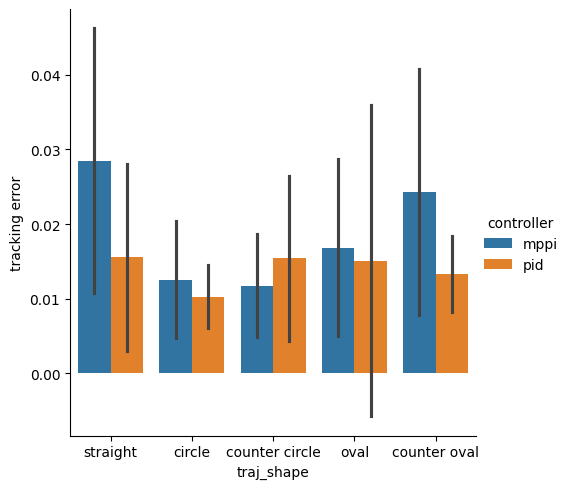

In [303]:
g = sns.catplot(data=error_df, x='traj_shape',y='error', hue='controller',errorbar="sd",kind="bar")
# g.set(yscale='log')
g.set(ylabel='tracking error')

# 2024/1/18 Data (dt=`0.125`s)

In [18]:
error_dict = {
    # 'straight': {'mppi': None, 'pid': None},
    'circle': {'mppi': None, 'pid': None},
    'counter circle': {'mppi': None, 'pid': None},
    # 'oval': {'mppi': None, 'pid': None},
    # 'counter oval': {'mppi': None, 'pid': None},
}

## Circle

In [19]:
log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240118-140821'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [6, 158], orientation_provider="ORIENTATION_PROVIDOER")
obs_pid_circle = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240118-141403'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [18, 116], orientation_provider="ORIENTATION_PROVIDOER")
obs_pid_counter_circle = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240118-142356'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [20, 151], orientation_provider="ORIENTATION_PROVIDOER")
obs_mppi_circle = p_dict['obs']

log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20240118-141930'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [16, 151], orientation_provider="ORIENTATION_PROVIDOER")
obs_mppi_counter_circle = p_dict['obs']

def distance_circle(x, y):
    dist = np.sqrt((x-1.)**2+(y-1.2)**2) -1.2
    return dist

def distance_counter_circle(x,y):
    dist = np.sqrt((x-.9)**2+(y-1.2)**2) -1.2
    return dist

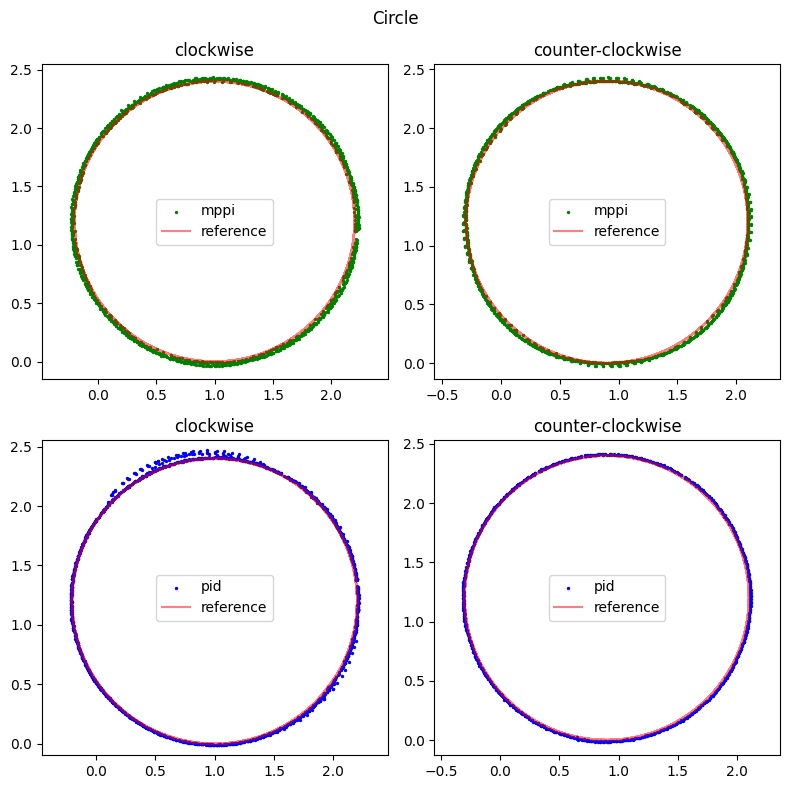

In [20]:
fig, axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].scatter(obs_mppi_circle[:,0],obs_mppi_circle[:,1],s=2,color='green',label='mppi')
axs[0,1].scatter(obs_mppi_counter_circle[:,0],obs_mppi_counter_circle[:,1],s=2,color='green',label='mppi')
axs[1,0].scatter(obs_pid_circle[:,0],obs_pid_circle[:,1],s=2,color='blue',label='pid')
axs[1,1].scatter(obs_pid_counter_circle[:,0],obs_pid_counter_circle[:,1],s=2,color='blue',label='pid')

axs[0,0].plot(obs_mppi_circle[:,5],obs_mppi_circle[:,6], color='red', alpha=0.5,label='reference',)
axs[0,1].plot(obs_mppi_counter_circle[:,5],obs_mppi_counter_circle[:,6], color='red', alpha=0.5,label='reference',)
axs[1,0].plot(obs_pid_circle[:,5],obs_pid_circle[:,6], color='red', alpha=0.5,label='reference',)
axs[1,1].plot(obs_pid_counter_circle[:,5],obs_pid_counter_circle[:,6], color='red', alpha=0.5,label='reference',)

for i in range(2):
    for j in range(2):
        axs[i,j].axis("equal")
        axs[i,j].legend()
        if j == 1:
            axs[i,j].set_title('counter-clockwise')
        if j == 0:    
            axs[i,j].set_title('clockwise')
plt.suptitle("Circle")
plt.tight_layout()

error_dict['circle']['mppi'] = distance_circle(obs_mppi_circle[:,0],obs_mppi_circle[:,1]).tolist()
error_dict['counter circle']['mppi'] = distance_counter_circle(obs_mppi_counter_circle[:,0],obs_mppi_counter_circle[:,1]).tolist()
error_dict['circle']['pid'] = distance_circle(obs_pid_circle[:,0],obs_pid_circle[:,1]).tolist()
error_dict['counter circle']['pid'] = distance_counter_circle(obs_pid_counter_circle[:,0],obs_pid_counter_circle[:,1]).tolist()

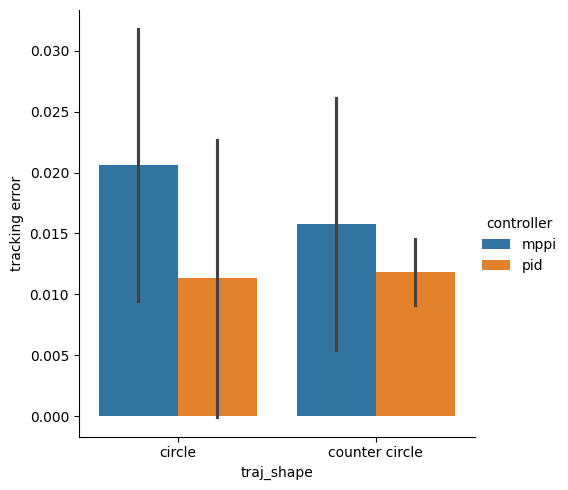

In [21]:
error_df_dict = {'controller':[], 'traj_shape': [], 'error': []}
for traj_shape in error_dict.keys():
    traj_error = error_dict[traj_shape]
    for controller in traj_error.keys():
        err = traj_error[controller]
        num_points = len(err)
        error_df_dict['controller'] += [controller] * num_points
        error_df_dict['traj_shape'] += [traj_shape] * num_points
        error_df_dict['error'] += err
error_df = pd.DataFrame(error_df_dict)
g = sns.catplot(data=error_df, x='traj_shape',y='error', hue='controller',errorbar="sd",kind="bar")
# g.set(yscale='log')
g.set(ylabel='tracking error')